.

Deep_Learing_TIL(20190720)

#### study program : https://www.fastcampus.co.kr/data_camp_deeplearning


#### 개요

치킨이미지를 브랜드별로 분류할 수 있는 CNN(Mobilenet를 차용하여 fine tuning 한 형태) 모델 구현

(실습환경 : Google Colab)

#### 목차

step 1) prepare dataset

step 2) train and val data split

step 3) Mobilenet을 차용하여 fine tuning 한 모델 구현

#### step 1) prepare dataset

In [0]:
from google.colab import drive
import os
if not os.path.exists('/content/gdrive'):
    drive.mount('/content/gdrive')

In [7]:
cd '/content/gdrive/My Drive/TensorFlow_Training_13th'

/content/gdrive/My Drive/TensorFlow_Training_13th


In [8]:
ls

 0_1.Colab_Env_Setup.pdf
 0_1.GoogleDriveMount_GitClone.ipynb
 1_1.python_numpy_basic.ipynb
 1_2.TensorFlow_Basics_1.x.ipynb
 1_2.TensorFlow_Basics_2.0.ipynb
 1_Tensorflow_intro.pdf
 2_1.Linear_Regression_Simple.ipynb
 2_1.Linear_Regression_Simple_Keras.ipynb
 2_2.Linear_Regression_from_Text.ipynb
 2_3.Linear_Regression_from_Text_minibatch.ipynb
 2_4.Linear_Regression_from_Text_using_Dataset.ipynb
 2_5.Logistic_regression.ipynb
 3_1.mnist_logistic_regression.ipynb
 3_2.mnist_mlp.ipynb
 3_3.mnist_mlp_deeper.ipynb
 3_4.mnist_mlp_dropout.ipynb
 3_5.mnist_mlp_l2_reg.ipynb
 3_6.mnist_mlp_batchnorm.ipynb
 3_7.mnist_mlp_learning_rate_decay.ipynb
 4_1_1.load_saved_models.ipynb
 4_1.mnist_cnn_sequential.ipynb
 4_2.mnist_cnn_functional.ipynb
 4_3.mnist_cnn_subclassing.ipynb
 4_4.mnist_cnn_keras_only.ipynb
 5_1.simple_cnn_cifar10.ipynb
 5_2.mobilenet_cifar10.ipynb
 6_0.prepare_dataset.ipynb
 6_1.train_val_split.ipynb
 6_2.CNN_keras_custom_data.ipynb
 6_3.CNN_finetuning_keras_custom_data.ipynb
 6_

In [9]:
!unzip chicken.zip -d ./chicken

Archive:  chicken.zip
  inflating: ./chicken/BBQ/105.png   
  inflating: ./chicken/BBQ/108.png   
  inflating: ./chicken/BBQ/11.png    
  inflating: ./chicken/BBQ/116.png   
  inflating: ./chicken/BBQ/119.png   
  inflating: ./chicken/BBQ/12.png    
  inflating: ./chicken/BBQ/125.png   
  inflating: ./chicken/BBQ/143.png   
  inflating: ./chicken/BBQ/151.png   
  inflating: ./chicken/BBQ/154.png   
  inflating: ./chicken/BBQ/158.png   
  inflating: ./chicken/BBQ/164.png   
  inflating: ./chicken/BBQ/168.png   
  inflating: ./chicken/BBQ/172.png   
  inflating: ./chicken/BBQ/176.png   
  inflating: ./chicken/BBQ/183.png   
  inflating: ./chicken/BBQ/188.png   
  inflating: ./chicken/BBQ/190.png   
  inflating: ./chicken/BBQ/193.png   
  inflating: ./chicken/BBQ/195.png   
  inflating: ./chicken/BBQ/199.png   
  inflating: ./chicken/BBQ/20.png    
  inflating: ./chicken/BBQ/203.png   
  inflating: ./chicken/BBQ/204.png   
  inflating: ./chicken/BBQ/208.png   
  inflating: ./chicken/BBQ/2

In [10]:
ls

 0_1.Colab_Env_Setup.pdf
 0_1.GoogleDriveMount_GitClone.ipynb
 1_1.python_numpy_basic.ipynb
 1_2.TensorFlow_Basics_1.x.ipynb
 1_2.TensorFlow_Basics_2.0.ipynb
 1_Tensorflow_intro.pdf
 2_1.Linear_Regression_Simple.ipynb
 2_1.Linear_Regression_Simple_Keras.ipynb
 2_2.Linear_Regression_from_Text.ipynb
 2_3.Linear_Regression_from_Text_minibatch.ipynb
 2_4.Linear_Regression_from_Text_using_Dataset.ipynb
 2_5.Logistic_regression.ipynb
 3_1.mnist_logistic_regression.ipynb
 3_2.mnist_mlp.ipynb
 3_3.mnist_mlp_deeper.ipynb
 3_4.mnist_mlp_dropout.ipynb
 3_5.mnist_mlp_l2_reg.ipynb
 3_6.mnist_mlp_batchnorm.ipynb
 3_7.mnist_mlp_learning_rate_decay.ipynb
 4_1_1.load_saved_models.ipynb
 4_1.mnist_cnn_sequential.ipynb
 4_2.mnist_cnn_functional.ipynb
 4_3.mnist_cnn_subclassing.ipynb
 4_4.mnist_cnn_keras_only.ipynb
 5_1.simple_cnn_cifar10.ipynb
 5_2.mobilenet_cifar10.ipynb
 6_0.prepare_dataset.ipynb
 6_1.train_val_split.ipynb
 6_2.CNN_keras_custom_data.ipynb
 6_3.CNN_finetuning_keras_custom_data.ipynb
 6_

In [11]:
ls chicken

BBQ/  BHC/  goobne/  kyochon/  nene/  ttobongee/


#### step 2) train and val data split

In [0]:
import numpy as np
import os
import shutil
import tensorflow as tf
from sklearn.model_selection import train_test_split
from PIL import Image

In [13]:
cd '/content/gdrive/My Drive/TensorFlow_Training_13th'

/content/gdrive/My Drive/TensorFlow_Training_13th


In [8]:
cur_dir = os.getcwd()
print(cur_dir)

/content/gdrive/My Drive/TensorFlow_Training_13th


In [9]:
## Train Dataset이 있는 directory 경로
train_dir = os.path.join(cur_dir, 'chicken')
print("Train Dataset Directory Path : ", train_dir)

## Train directory 아래에 directory 이름과 갯수 확인(class 수)
categories = sorted([dname for dname in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, dname))])
n_class = len(categories)
print("This dataset has {} classes".format(n_class))
print("Class names :")
print(categories)

Train Dataset Directory Path :  /content/gdrive/My Drive/TensorFlow_Training_13th/chicken
This dataset has 6 classes
Class names :
['BBQ', 'BHC', 'goobne', 'kyochon', 'nene', 'ttobongee']


In [10]:
## Train Dataset 중 몇 %를 Validation Dataset으로 사용할 지 비율
val_ratio = 1/5
## Validation Dataset을 저장할 direcyory 이름
val_dname = 'chicken_val'
val_dir = os.path.join(train_dir, '..', val_dname)
os.makedirs(val_dir, exist_ok=True)
print(val_dir)

/content/gdrive/My Drive/TensorFlow_Training_13th/chicken/../chicken_val


In [11]:
## image file 확장자
valid_exts = ['.jpg', '.png', '.jpeg', '.gif']

## 조건에 맞는 image file만 남기고 삭제
for category in categories:
    cat_dir = os.path.join(train_dir, category)
    fnames = os.listdir(cat_dir)
    
    for fname in fnames:
        ext = os.path.splitext(fname)[1]
        fpath = os.path.join(cat_dir, fname)
        ## image file이 아닐 경우 삭제
        if ext.lower() not in valid_exts:
            ## 주의!! 파일 삭제!! 
            os.remove(fpath)
            continue
        img = Image.open(fpath)
        img = np.asarray(img)        
        ## grey scale image의 경우 channel을 3으로 확장
        try:
            ch = img.shape[2]
        except:
            img = np.tile(np.expand_dims(img, axis=2), [1, 1, 3])
            ch = image.shape[2]
        ## channel이 3이 아닌 경우(channel이 4인 경우) 삭제
        if ch != 3:
            print("{} has 4 channels".format(fpath))
            ## 주의!! 파일 삭제!!
            os.remove(fpath)
            continue
    
    n_imgs = len(os.listdir(cat_dir))    
    print("{} class has {} images".format(category, n_imgs))
    
    ## Train Dataset중 일부를 Validation Dataset directory로 이동
    train_idx, val_idx = train_test_split(np.arange(n_imgs), train_size=(1.-val_ratio))
    
    val_cat_dir = os.path.join(val_dir, category)
    os.makedirs(val_cat_dir, exist_ok=True)
    
    fnames = os.listdir(cat_dir)
    val_cnt = 0
    for idx, fname in enumerate(fnames):
        fpath = os.path.join(cat_dir, fname)
        if idx in val_idx:
            shutil.move(fpath, val_cat_dir)
            val_cnt += 1
    print("{} images are moved to the validation dataset".format(val_cnt))
    print("{} images are in the train dataset".format(n_imgs - val_cnt))
    print()

BBQ class has 189 images
38 images are moved to the validation dataset
151 images are in the train dataset

BHC class has 157 images
32 images are moved to the validation dataset
125 images are in the train dataset

goobne class has 178 images
36 images are moved to the validation dataset
142 images are in the train dataset

kyochon class has 172 images
35 images are moved to the validation dataset
137 images are in the train dataset

nene class has 164 images
33 images are moved to the validation dataset
131 images are in the train dataset

ttobongee class has 153 images
31 images are moved to the validation dataset
122 images are in the train dataset



#### step 3) Mobilenet을 차용하여 fine tuning 한 모델 구현

In [0]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import matplotlib.pyplot as plt
print(tf.__version__)

2.0.0-beta1


In [0]:
from tensorflow.keras.layers import Conv2D, ReLU, MaxPooling2D, Dense, BatchNormalization, Softmax, GlobalAveragePooling2D

In [0]:
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input

# 캐라스에 이미 학습되어 업로드된 모델을 갖다 쓰는 것이다.
# 텐서플로우도 텐서플로우 허브에 가면 네트워크(가중치)들을 갖다 쓸 수 있다.

In [0]:
learning_rate = 0.0002
img_size = 224
batch_size = 16

In [0]:
cd '/content/gdrive/My Drive/TensorFlow_Training_13th'

/content/gdrive/My Drive/TensorFlow_Training_13th


In [0]:
cur_dir = os.getcwd()

train_dir = os.path.join(cur_dir, 'chicken')
val_dir = os.path.join(cur_dir, 'chicken_val')

n_class = len(os.listdir(train_dir))
print("This Dataset has {} classes".format(n_class))

n_train = 0
n_val = 0
for _, _, files in os.walk(train_dir):
    if files:
        n_train += len(files)
for _, _, files in os.walk(val_dir):
    if files:
        n_val += len(files)
        
print("Train Dataset has {} images".format(n_train))
print("Validation Dataset has {} images".format(n_val))

This Dataset has 6 classes
Train Dataset has 808 images
Validation Dataset has 205 images


In [0]:
datagen = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [0]:
sample_dir = os.listdir(train_dir)[0]
fnames = sorted([os.path.join(train_dir, sample_dir, fname) for fname in os.listdir(
                                                            os.path.join(train_dir, sample_dir))])

In [0]:
num_org_imgs = 5
num_iter = 20
img_paths = fnames[:num_org_imgs]

In [0]:
img_list = []
for img_path in img_paths:
    img = image.load_img(img_path, target_size=(img_size, img_size))
    x = image.img_to_array(img)
    img_list.append(x)

img_list = np.array(img_list)
img_list.shape

(5, 224, 224, 3)

In [0]:
row = num_iter // num_org_imgs
col = num_org_imgs
i = 0
plt.figure(figsize=(col*4, row*4))
for batch in datagen.flow(img_list, batch_size=1):
    plt.subplot(row, col, i+1)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i == num_iter:
        break

plt.show()

In [0]:
# weights = imagenet는 데이터로 학습한 가중치를 가져올 것이다.
# include_top = False로 하면 마지막에 1000개 그부분을 빼고 fully connected layer 
# 들어가기 전까지만 가져오겠다는 것이다.
# 다시말해서 마지막에 fully connected layer 1000개를 짤라내고 클래스를 사용자 임의로
# 6개면 6개로해서 추가학습을 시키는 것이다.
# include_top을 True로 하면 input_shape를 임의로 바꿀수 없다.

conv_base = MobileNet(weights='imagenet',include_top=False,input_shape=(img_size, img_size, 3))
conv_base.summary()

17227776/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________

In [0]:
# 위에서 받아온 conv_base를 시퀀셜에다 집어넣고
# model.add(conv_base)처럼 모델에 집어넣고 레이어 하나처럼 쓰면된다.
# 그다음에 글로벌 에버리지 풀링하고, fully connected layer 두개를 썼다.

# trainable을 false로 할수도 있다. 이걸 false로 하면 읽어온 레이어는 
# 학습을 안시키겠다는 것이다. 가져온 레이어는 가중치를 고정하고
# 내가 새로 추가하는 부분만 학습시키겠다는 것이다.
# 내가 가진 데이터가 매우 적을때 이 방법을 쓰는 경우가 많다.

model = models.Sequential()
model.add(conv_base)
model.add(GlobalAveragePooling2D())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dense(n_class))
model.add(BatchNormalization())
model.add(Softmax())

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 7, 7, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               262400    
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
re_lu (ReLU)                 (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 1542      
_________________________________________________________________
batch_normalization_1 (Batch (None, 6)                 2

In [0]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=learning_rate,
                                                          decay_steps=n_train//batch_size*5,
                                                          decay_rate=0.5,
                                                          staircase=True)
model.compile(optimizers.Adam(lr_schedule), loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [0]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_dir,
                                               target_size=(img_size, img_size),
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 808 images belonging to 6 classes.
Found 205 images belonging to 6 classes.


In [0]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=n_train//batch_size,
                             epochs=10,
                             validation_data=val_generator,
                             validation_steps=n_val//batch_size)

Epoch 1/10


W0730 14:18:19.941306 139895213557632 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


50/50 [==============================] - 264s 5s/step - loss: 1.3121 - accuracy: 0.5189 - val_loss: 0.8908 - val_accuracy: 0.7083
Epoch 2/10
50/50 [==============================] - 23s 451ms/step - loss: 0.8955 - accuracy: 0.7487 - val_loss: 0.7828 - val_accuracy: 0.7396
Epoch 3/10
50/50 [==============================] - 22s 444ms/step - loss: 0.7644 - accuracy: 0.8207 - val_loss: 0.6934 - val_accuracy: 0.7969
Epoch 4/10
50/50 [==============================] - 22s 447ms/step - loss: 0.6838 - accuracy: 0.8675 - val_loss: 0.6697 - val_accuracy: 0.7969
Epoch 5/10
50/50 [==============================] - 22s 442ms/step - loss: 0.6066 - accuracy: 0.9082 - val_loss: 0.7189 - val_accuracy: 0.8073
Epoch 6/10
50/50 [==============================] - 22s 436ms/step - loss: 0.5785 - accuracy: 0.9179 - val_loss: 0.7033 - val_accuracy: 0.8385
Epoch 7/10
50/50 [==============================] - 22s 434ms/step - loss: 0.5431 - accuracy: 0.9343 - val_loss: 0.6294 - val_accuracy: 0.8802
Epoch 8/10
5

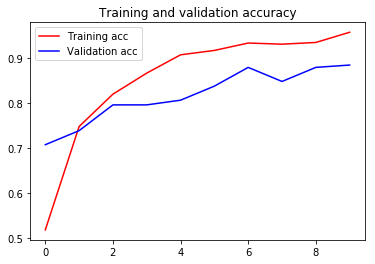

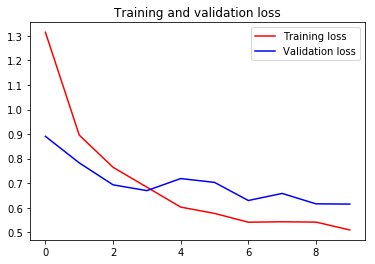

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()